In [1]:
import numpy as np
import pandas as pd
import low_rank_models as lrm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('error_matrix_small.csv', index_col=0)
models = np.array(list(df))
dataset_IDs = df.index.values
errorMtx = df.values
n_datasets, n_models = errorMtx.shape

In [3]:
BC_predictions = pd.read_csv('predictions/rank9_BC.csv', index_col=0).values
QRA_predictions = pd.read_csv('predictions/rank9_QRA.csv', index_col=0).values
QRY_predictions = pd.read_csv('predictions/rank9_QRY.csv', index_col=0).values
QRV_predictions = pd.read_csv('predictions/rank9_QRV.csv', index_col=0).values
SRND_predictions = pd.read_csv('predictions/rank9_SRND.csv', index_col=0).values
RND_predictions = pd.read_csv('predictions/rank9_RND.csv', index_col=0).values
predictions = [BC_predictions, QRA_predictions, QRY_predictions, QRV_predictions, SRND_predictions, RND_predictions]

In [4]:
def sameAlg(testBestCol):
    testBestAlgType = []
    for i in range(len(testBestCol)):
        # testBestAlgType.append(eval(models[testBestCol[i]])['algorithm'])
        testBestAlgType.append(models[testBestCol[i]].split('.')[0])
    return np.array(testBestAlgType)

In [5]:
bestModel = np.argmin(errorMtx, axis=1)
bestAlg = sameAlg(bestModel)
bestError = np.min(errorMtx, axis=1)

In [6]:
correct_model = []
correct_alg = []
error_diff = []

for method in range(len(predictions)):
    prediction = predictions[method]
    
    cm = np.zeros(n_models)
    ca = np.zeros((n_datasets, n_models)).astype(int)
    ed = np.zeros((n_datasets, n_models))
    
    for i in range(n_models):
        cm[i] = (prediction[:,i] == bestModel).sum()
        for j in range(n_datasets):
            ed[j,i] = errorMtx[j, prediction[j,i]] - bestError[j]
        if i==0:
            ca[:,i] = sameAlg(prediction[:,i]) == bestAlg
        else:
            ca[:,i] = np.logical_or(ca[:,i-1], sameAlg(prediction[:,i]) == bestAlg)
    for j in range(n_datasets):
        ed[j] = np.minimum.accumulate(ed[j])
            
    correct_model.append(np.cumsum(cm))
    correct_alg.append(np.sum(ca, axis=0))
    error_diff.append(np.mean(ed, axis=0))   

In [12]:
max_entries = 20
n_samples = 5
fontsize = 14
methods = ['best cols', 'QR (A)', 'QR (Y)', 'QR', 'semi-random', 'random']

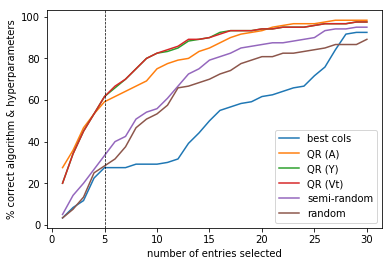

In [8]:
x = np.arange(1, n_models+1, 1)[0:max_entries]
for i in range(len(methods)):
    plt.plot(x, correct_model[i][0:max_entries]*100/n_datasets, label=methods[i])
plt.axvline(x=n_samples, linestyle='dashed', linewidth=0.7, color='black')
plt.legend(loc='lower right')
plt.xlabel('number of entries selected')
plt.xticks(np.arange(0, max_entries + 5, 5))
plt.yticks([0,20,40,60,80,100])
plt.ylabel('% correct algorithm & hyperparameters')
plt.show()

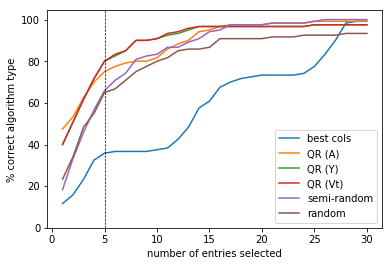

In [9]:
x = np.arange(1, n_models+1, 1)[0:max_entries]
for i in range(len(methods)):
    plt.plot(x, correct_alg[i][0:max_entries]*100/n_datasets, label=methods[i])
plt.axvline(x=n_samples, linestyle='dashed', linewidth=0.7, color='black')
plt.legend(loc='lower right')
plt.xlabel('number of entries selected')
plt.xticks(np.arange(0, max_entries + 5, 5))
plt.yticks([0,20,40,60,80,100])
plt.ylabel('% correct algorithm type')
plt.show()

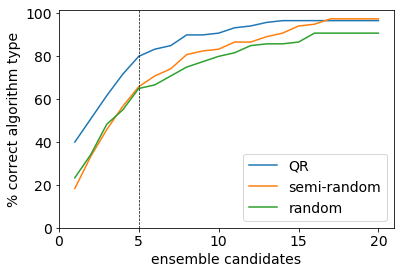

In [14]:
x = np.arange(1, n_models+1, 1)[0:max_entries]
for i in [3,4,5]:
    plt.plot(x, correct_alg[i][0:max_entries]*100/n_datasets, label=methods[i])
plt.axvline(x=n_samples, linestyle='dashed', linewidth=0.7, color='black')
plt.legend(loc='lower right', fontsize=fontsize)
plt.xlabel('ensemble candidates', fontsize=fontsize)
plt.xticks(np.arange(0, max_entries + 5, 5), fontsize=fontsize)
plt.yticks([0,20,40,60,80,100], fontsize=fontsize)
plt.ylabel('% correct algorithm type', fontsize=fontsize)
plt.show()

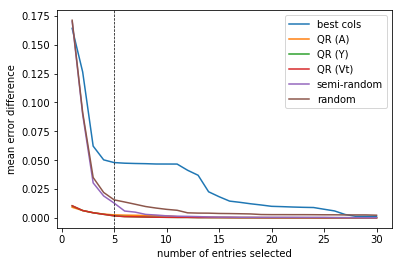

In [10]:
x = np.arange(1, n_models+1, 1)[0:max_entries]
for i in range(len(methods)):
    plt.plot(x, error_diff[i][0:max_entries], label=methods[i])
plt.axvline(x=n_samples, linestyle='dashed', linewidth=0.7, color='black')
plt.legend(loc='upper right')
plt.xlabel('number of entries selected')
plt.xticks(np.arange(0, max_entries + 5, 5))
plt.ylabel('mean error difference')
plt.show()